In [1]:
import sys
sys.path.append('../')
from xd import *
from utils import *
import esutil
import healpy as hp
from systematics import *
from systematics_module import *
import os
from numpy.lib.recfunctions import append_fields
import scipy.stats

import matplotlib.pyplot as plt
import numpy as np
from run_systematics import sys_iteration, weightmultiply, fitting_allSP, calling_sysMap

In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
file_path = '/users/PCON0003/warner785/DMASSY3/code_py3/'
current_map = 'SKYVAR_UNCERTr'

# add in DMASS without prob cut

with open(file_path + current_map+'vali_noweightnumber_density.txt') as dm0:
#    w  = [float(x) for x in next(randoms).split()]
    no_dens = [float(x) for x in dm0]
dm0.close()

with open(file_path + current_map+'vali_noweighterror.txt') as dm1:
#    w  = [float(x) for x in next(randoms).split()]
    no_error = [float(x) for x in dm1]
dm1.close()

with open(file_path + current_map+'vali_weightnumber_density.txt') as dm2:
#    w  = [float(x) for x in next(dmass).split()]
    final_dens = [float(x) for x in dm2]
dm2.close()

with open(file_path + current_map+'vali_weighterror.txt') as dm3:
#    w  = [float(x) for x in next(randoms).split()]
    final_error = [float(x) for x in dm3]
dm3.close()

'''
with open(file_path + current_map+'prob_cut20number_density.txt') as dm0:
#    w  = [float(x) for x in next(randoms).split()]
    quad_dens = [float(x) for x in dm0]
dm0.close()

with open(file_path + current_map+'prob_cut20error.txt') as dm1:
#    w  = [float(x) for x in next(randoms).split()]
    quad_error = [float(x) for x in dm1]
dm1.close()


'''

'''
with open(file_path + current_map+'star20number_density.txt') as dm0:
#    w  = [float(x) for x in next(randoms).split()]
    star_dens = [float(x) for x in dm0]
dm0.close()

with open(file_path + current_map+'star20error.txt') as dm1:
#    w  = [float(x) for x in next(randoms).split()]
    star_error = [float(x) for x in dm1]
dm1.close()

with open(file_path + current_map+'maglim_check_weights2number_density.txt') as dm0:
#    w  = [float(x) for x in next(randoms).split()]
    mag_dens = [float(x) for x in dm0]
dm0.close()

with open(file_path + current_map+'maglim_check_weights2error.txt') as dm1:
#    w  = [float(x) for x in next(randoms).split()]
    mag_error = [float(x) for x in dm1]
dm1.close()

'''

"\nwith open(file_path + current_map+'star20number_density.txt') as dm0:\n#    w  = [float(x) for x in next(randoms).split()]\n    star_dens = [float(x) for x in dm0]\ndm0.close()\n\nwith open(file_path + current_map+'star20error.txt') as dm1:\n#    w  = [float(x) for x in next(randoms).split()]\n    star_error = [float(x) for x in dm1]\ndm1.close()\n\nwith open(file_path + current_map+'maglim_check_weights2number_density.txt') as dm0:\n#    w  = [float(x) for x in next(randoms).split()]\n    mag_dens = [float(x) for x in dm0]\ndm0.close()\n\nwith open(file_path + current_map+'maglim_check_weights2error.txt') as dm1:\n#    w  = [float(x) for x in next(randoms).split()]\n    mag_error = [float(x) for x in dm1]\ndm1.close()\n\n"

In [3]:
with open(file_path + current_map+'pcenter.txt') as dm4:
#    w  = [float(x) for x in next(randoms).split()]
    pcenter = [float(x) for x in dm4]
dm4.close()

g:
-0.09373918384313584
-0.07656839147210122

r:
-0.07766367495059967
-0.06354239255189896

i:
-0.10090579837560654
-0.0828460231423378

z:
-0.08606237903237343
-0.06842043548822403

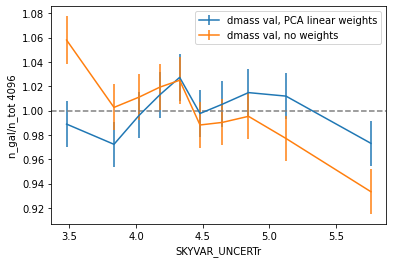

In [4]:
fig, ax = plt.subplots()
ax.errorbar( pcenter, final_dens, yerr=final_error, label = "dmass val, PCA linear weights")
ax.errorbar( pcenter, no_dens, yerr=no_error, label = "dmass val, no weights")
#ax.errorbar( pcenter, quad_dens, yerr=quad_error, label = "dmass_spt, initial sp weights")
##ax.errorbar( pcenter, quad_dens, yerr=quad_error, label = "dmass_spt, SP linear weights")
#ax.errorbar( pcenter, mag_dens, yerr=mag_error, label = "maglim, applied weights-- maglim cuts")
plt.legend()
#plt.ylim(0.98,1.05)
#plt.xlim(-0.6)
plt.xlabel(current_map)
plt.ylabel("n_gal/n_tot 4096")
#plt.axvline(x=-0.08606237903237343, color='red', linestyle='--')
#plt.axvline(x=-0.06842043548822403, color='green', linestyle='--')
plt.axhline(y=1, color='grey', linestyle='--')

# send plots to Ashley

In [81]:
# save which maps are being corrected for -- SP maps
#fig.savefig('../SPmap_official/'+current_map+'weight.pdf')

In [ ]:
#robustness check with CSFD map:

file_path = '/users/PCON0003/warner785/DMASSY3/code_py3/'
current_map = 'SFD98'

with open(file_path + current_map+'csfd_runnumber_density.txt') as dm0:
#    w  = [float(x) for x in next(randoms).split()]
    csfd_dens = [float(x) for x in dm0]
dm0.close()

with open(file_path + current_map+'csfd_runweighterror.txt') as dm1:
#    w  = [float(x) for x in next(randoms).split()]
    csfd_error = [float(x) for x in dm1]
dm1.close()

'''
with open(file_path + current_map+'sfd_noweightnumber_density.txt') as dm2:
#    w  = [float(x) for x in next(dmass).split()]
    no_dens = [float(x) for x in dm2]
dm2.close()

with open(file_path + current_map+'sfd_noweighterror.txt') as dm3:
#    w  = [float(x) for x in next(randoms).split()]
    no_error = [float(x) for x in dm3]
dm3.close()

with open(file_path + current_map+'sfd_weightnumber_density.txt') as dm2:
#    w  = [float(x) for x in next(dmass).split()]
    final_dens = [float(x) for x in dm2]
dm2.close()

with open(file_path + current_map+'sfd_weighterror.txt') as dm3:
#    w  = [float(x) for x in next(randoms).split()]
    final_error = [float(x) for x in dm3]
dm3.close()

'''

with open(file_path + current_map+'pcenter.txt') as dm4:
#    w  = [float(x) for x in next(randoms).split()]
    pcenter = [float(x) for x in dm4]
dm4.close()

fig, ax = plt.subplots()
ax.errorbar( pcenter, csfd_dens, yerr=csfd_error, label = "dmass spt, csfd")
##ax.errorbar( pcenter, no_dens, yerr=no_error, label = "dmass spt, no weights")
#ax.errorbar( pcenter, quad_dens, yerr=quad_error, label = "dmass_spt, initial sp weights")
#ax.errorbar( pcenter, quad_dens, yerr=quad_error, label = "dmass_spt, SP linear weights")
#ax.errorbar( pcenter, mag_dens, yerr=mag_error, label = "maglim, applied weights-- maglim cuts")
plt.legend()
#plt.ylim(0.98,1.05)
#plt.xlim(-0.6)
plt.xlabel(current_map)
plt.ylabel("n_gal/n_tot 4096")
#plt.axvline(x=-0.08606237903237343, color='red', linestyle='--')
#plt.axvline(x=-0.06842043548822403, color='green', linestyle='--')
plt.axhline(y=1, color='grey', linestyle='--')

In [4]:
chi2_f = np.loadtxt('/users/PCON0003/warner785/DMASSY3/code_py3/'+'vali_newweighttrue_chi2_dmass_SP.txt')
#chi2_star =  np.loadtxt('/users/PCON0003/warner785/DMASSY3/code_py3/'+'SPfinal19_chi2_dmass_SP.txt')
chi2_i = np.loadtxt('/users/PCON0003/warner785/DMASSY3/code_py3/'+'vali_newweight_chi2_dmass_SP.txt')
#chi2_without_sfd =  np.loadtxt('/users/PCON0003/warner785/DMASSY3/code_py3/'+'SFD98test7_chi2_dmass_SP.txt')
##chi2_vali = np.loadtxt('/users/PCON0003/warner785/DMASSY3/code_py3/'+'valichi2_dmassi_spt.txt')
#trendi = np.loadtxt('/users/PCON0003/warner785/DMASSY3/code_py3/'+'valichi2_trend_spt.txt')
#trendf = np.loadtxt('/users/PCON0003/warner785/DMASSY3/code_py3/'+'vali19chi2_trend_spt.txt')
##chi2_valf =  np.loadtxt('/users/PCON0003/warner785/DMASSY3/code_py3/'+'vali19chi2_dmassi_spt.txt')
#trend = np.loadtxt('/users/PCON0003/warner785/DMASSY3/code_py3/chi2_threshold.txt')

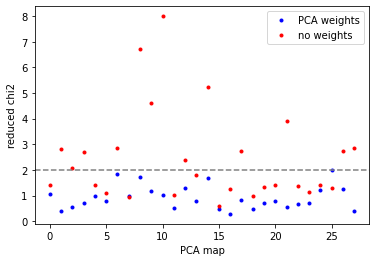

In [5]:
#diff_i = (chi2_vali-trendi)/trend
#diff_f = (chi2_valf-trendf)/trend
#chi2_vali = chi2_vali/10
#chi2_valf = chi2_valf/10

import matplotlib.pyplot as plt
plt.plot(chi2_f, color='blue', marker='.', linestyle = 'None', label='PCA weights')
plt.plot(chi2_i, color='red', marker='.', linestyle = 'None', label='no weights')
#plt.plot(chi2_star, color='green', marker='.', linestyle = 'None', label='SP weights')
#plt.plot(chi2_star, color='green', marker='.', linestyle = 'None', label='SP weights corrected')
plt.axhline(y=2, color='grey', linestyle='--')
#plt.plot(tre, marker='.', label='delta/trend')
#plt.hist(chi2, bins = 15)
plt.legend()
plt.ylabel('reduced chi2') 
plt.xlabel('PCA map')
#plt.title("SP map crosscheck") 
plt.show()

# make delta/trend for no weights as well ( new axis )
# different signal binning for FGCM-- try this method

In [28]:
from sys_functions import *
#NERSC:
#random_chron = '/fs/scratch/PCON0008/warner785/bwarner/june23_validation/random_val_chron.fits'
#weighted_dmass_chron = '/fs/scratch/PCON0008/warner785/bwarner/june23_validation/dmass_val_weighted.fits'

dmass_val = calling_catalog('/users/PCON0003/warner785/DMASSY3/output/test/train_cat/y3/dmass_part2.fits')
index_mask = np.argsort(dmass_val)
dmass_chron = dmass_val[index_mask]
weights =fitsio.read('/fs/scratch/PCON0008/warner785/bwarner/june23_validation/vali19.fits')
dmass_val2 = append_fields(dmass_chron, 'sys_weight', weights, usemask=False)
esutil.io.write('/fs/scratch/PCON0008/warner785/bwarner/june23_validation/'+'dmass_val_weighted.fits', dmass_val2, overwrite=True)
#scp warner785@pitzer.osc.edu:/fs/scratch/PCON0008/warner785/bwarner/dmass_cardinal_FULL.fits ./

Resulting catalog size
DMASS= 27833.545127855094


Resulting catalog size
DMASS= 27833.545127855094
('RA', 'DEC', 'CMASS_PROB', 'HPIX_4096')


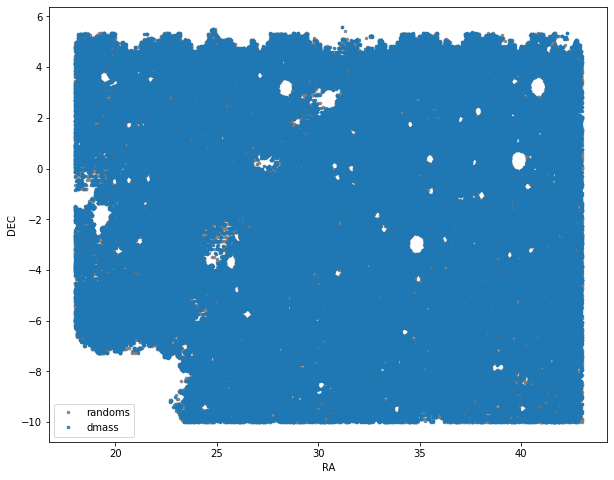

In [77]:
random =fitsio.read('/fs/scratch/PCON0008/warner785/bwarner/june23_validation/random_val_chron.fits')
dmass_val = calling_catalog('/users/PCON0003/warner785/DMASSY3/output/test/train_cat/y3/dmass_part2.fits')
print(random.dtype.names)
spatialcheck([random, dmass_val], 
             label = ['randoms', 'dmass'], convert = None, ratag='RA',dectag='DEC')

In [30]:
print(dmass_val2.dtype.names)

('COADD_OBJECT_ID', 'RA', 'DEC', 'HPIX_4096', 'MAG_DETMODEL_G', 'MAGERR_DETMODEL_G', 'MAG_DETMODEL_R', 'MAGERR_DETMODEL_R', 'MAG_DETMODEL_I', 'MAGERR_DETMODEL_I', 'MAG_DETMODEL_Z', 'MAGERR_DETMODEL_Z', 'MOF_CM_MAG_ERR_G', 'MOF_CM_MAG_ERR_R', 'MOF_CM_MAG_ERR_I', 'MOF_CM_MAG_ERR_Z', 'MOF_CM_MAG_CORRECTED_G', 'MOF_CM_MAG_CORRECTED_R', 'MOF_CM_MAG_CORRECTED_I', 'MOF_CM_MAG_CORRECTED_Z', 'SOF_CM_MAG_ERR_G', 'SOF_CM_MAG_ERR_R', 'SOF_CM_MAG_ERR_I', 'SOF_CM_MAG_ERR_Z', 'SOF_CM_MAG_CORRECTED_G', 'SOF_CM_MAG_CORRECTED_R', 'SOF_CM_MAG_CORRECTED_I', 'SOF_CM_MAG_CORRECTED_Z', 'EXTENDED_CLASS_MASH_SOF', 'CMASS_PROB', 'WEIGHT', 'sys_weight')


In [147]:
# for PCA maps:

num = 2

with open(str(num)+'cov_number_density.txt') as dm0:
#    w  = [float(x) for x in next(randoms).split()]
    cov_dens = [float(x) for x in dm0]
dm0.close()

with open(str(num) +'cov_error.txt') as dm1:
#    w  = [float(x) for x in next(randoms).split()]
    cov_error = [float(x) for x in dm1]
dm1.close()

with open(str(num) +'_pcenter.txt') as dm2:
#    w  = [float(x) for x in next(dmass).split()]
    pcenter = [float(x) for x in dm2]
dm2.close()


with open(str(num)+'shot_number_density.txt') as dm3:
#    w  = [float(x) for x in next(randoms).split()]
    shot_dens = [float(x) for x in dm3]
dm3.close()

with open(str(num) +'shot_error.txt') as dm4:
#    w  = [float(x) for x in next(randoms).split()]
    shot_error = [float(x) for x in dm4]
dm4.close()

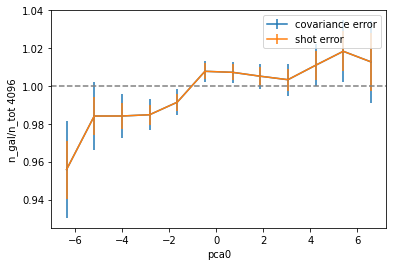

In [19]:
fig, ax = plt.subplots()
ax.errorbar( pcenter, cov_dens, yerr=cov_error, label = "covariance error")
ax.errorbar( pcenter, shot_dens, yerr=shot_error, label = "shot error")
plt.legend()
plt.xlabel('pca0')
plt.ylabel("n_gal/n_tot 4096")
plt.axhline(y=1, color='grey', linestyle='--')

In [4]:
cov_weights = fitsio.read('cov_runpc0_dmass_weight_spt.fits') 
sqrt_weights = fitsio.read('sqrt_runpc0_dmass_weight_spt.fits') 
shot_weights = fitsio.read('shot_runpc0_dmass_weight_spt.fits')
# chi2 comparison after correction
# chi2 distribution ordered -- to decide the proper cutoff
# post dmass spt
# github location + update on mocks/ code
# update main goals doc
# validation process for y3. -- list, well defined 

In [8]:
final_weights = fitsio.read('/fs/scratch/PCON0008/warner785/bwarner/june23_tests/final_area_run.fits')

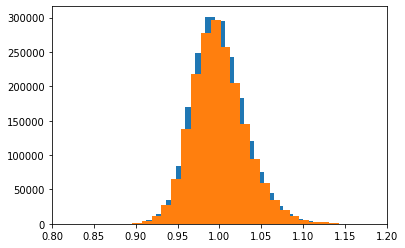

In [17]:
import matplotlib.pyplot as plt

plt.hist(cov_weights, bins = 100)
plt.hist(sqrt_weights, bins = 100)
plt.xlim(0.8, 1.2)
#plt.hist(shot_weights, bins = 100)
plt.show()

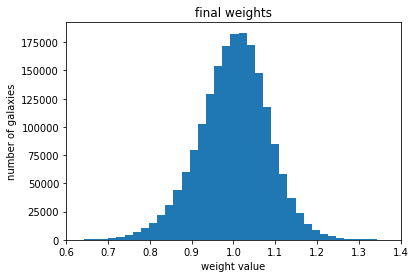

In [12]:
import matplotlib.pyplot as plt

plt.hist(final_weights, bins = 100)
plt.xlim(0.6, 1.4)
plt.ylabel('number of galaxies') 
plt.xlabel('weight value')
plt.title("final weights") 
#plt.hist(shot_weights, bins = 100)
plt.show()

In [2]:
file_path = '/users/PCON0003/warner785/DMASSY3/code_py3/'
with open(file_path+'finalqchi2_trend_spt.txt') as dm4:
#    w  = [float(x) for x in next(randoms).split()]
    chi2_trend = [float(x) for x in dm4]
dm4.close()
print(chi2_trend)

file_path = '/users/PCON0003/warner785/DMASSY3/code_py3/'
with open(file_path+'finalqchi2_dmassi_spt.txt') as dm3:
#    w  = [float(x) for x in next(randoms).split()]
    chi2_null = [float(x) for x in dm3]
dm3.close()

[4.365893781310403, 5.5137379650604945, 9.276021897803473, 7.576652293036125, 12.85707173557968, 3.6524527243189766, 5.043577889863254, 13.511077308769286, 18.366559054262954, 16.095095267024146, 9.824268953826042, 2.8907644168968023, 0.842144606220878, 9.804344560803361, 11.667510258387686, 0.4925166304444247, 5.720456598672839, 4.154748714926707, 7.532561001244659, 10.018992169447273, 3.4670449385904236, 5.215057687037668, 9.964665527711038, 6.059702225172625, 10.186450956139955, 5.812602613630162, 7.021659709641373, 2.7026668080135208, 3.112286018633136, 2.43858090203594, 8.235549882123294, 2.416906430048948, 4.286837615955764, 11.7882117892056, 9.187071300839383, 12.600282643988479, 12.559359270525782, 10.835572379723152, 14.708350708061634, 3.2628513278460005, 4.196125676686012, 2.022661006673058, 5.5864617871525795, 3.5286070075860265, 3.691152218222445, 7.508237174224001, 10.855398768397487, 3.244802803015501, 15.636648692095322, 15.63856820042679]


In [3]:
file_path = '/users/PCON0003/warner785/DMASSY3/code_py3/'
with open(file_path+'chi2_threshold.txt') as dm5:
#    w  = [float(x) for x in next(randoms).split()]
    thres_chi2 = [float(x) for x in dm5]
dm5.close()

In [4]:
diff = []
for i in range(50):
    diff.append(chi2_null[i] - chi2_trend[i])
print(diff)
threshold = []
for i in range(50):
    threshold.append(diff[i]/thres_chi2[i])

[167.86938656068145, 73.37323260407237, 9.87867106530061, 4.262357118923439, 16.04047554150543, 6.257029659355002, 46.00949646057357, 10.79826357583554, 71.59454434875948, 277.5616679788802, 98.53631328314518, 3.008994156704201, 49.10284740734779, 36.049412793088635, 0.6436210960575739, 66.40218543438016, 3.7497313655873983, 16.584221447533277, 27.412881076067833, 26.54677613708126, 40.14435113822553, 0.796967472165953, 15.927951405953554, 0.3387600501811727, 20.210003616914577, 10.435529445262713, 0.8165781939373611, 0.6100442603611063, 0.39515781617945045, 0.13586232332446802, 1.801722889002125, 3.4949096535648745, 3.647662969690514, 189.45059656897791, 2.5847494388128425, 0.6643011279853805, 14.287237383598566, 0.5349788444061438, 12.169575811813875, 4.7004426242306785, 6.2109305119624185, 28.30108126436691, 3.8441770616756834, -0.22388462437473766, 0.020366989421044313, 0.346308991377005, 39.97368445728505, 1.8073716054214097, 11.795864458874986, 68.84556316722279]


In [5]:
print(threshold)

[63.04708113609561, 31.944952733234455, 3.8809249117583615, 1.7447211558908458, 6.818091586240342, 2.610489598317421, 17.700290761874708, 4.247097272414914, 33.322969792191664, 144.91787858466347, 48.36016759558247, 1.246224898046643, 22.21657089969531, 13.5088554347511, 0.3311015189544697, 27.8217348901762, 1.9774979417127105, 6.824336253971539, 10.660729214033088, 12.025426211321573, 15.968165288645945, 0.338410743789031, 6.886347519733648, 0.13580388626603485, 10.962419378375195, 4.314655695385258, 0.30139451666617956, 0.3106415729800584, 0.1719046821125007, 0.05825582645684775, 0.7384029355600095, 1.4681481969377617, 1.7425483683016874, 174.73218130835053, 1.1101600725912528, 0.30768238391618674, 6.42343390770741, 0.21072313422490205, 5.390934956329749, 1.977260365718351, 2.7922688342016855, 12.40758984920246, 1.721949334147961, -0.09049668087677624, 0.011375626037631712, 0.16297757671798463, 17.333665431545924, 0.7780589909121264, 5.79026150186034, 39.84287108836599]


In [134]:
file_path = '/users/PCON0003/warner785/DMASSY3/code_py3/'
with open(file_path+'finalq32chi2_trend_spt.txt') as dm4:
#    w  = [float(x) for x in next(randoms).split()]
    weights_chi2_trend = [float(x) for x in dm4]
dm4.close()

file_path = '/users/PCON0003/warner785/DMASSY3/code_py3/'
with open(file_path+'finalq32chi2_dmassi_spt.txt') as dm3:
#    w  = [float(x) for x in next(randoms).split()]
    weights_chi2_null = [float(x) for x in dm3]
dm3.close()

In [135]:
diff_weights = []
for i in range(50):
    diff_weights.append(weights_chi2_null[i] - weights_chi2_trend[i])
print(diff_weights)
threshold_weights = []
for i in range(50):
    threshold_weights.append(diff_weights[i]/thres_chi2[i])

[0.09503397108956424, 0.7010235128046753, 0.22516536735143866, 0.010545775395510937, 0.21898021131772083, -0.01964603562039624, 1.2362425414121194, 0.10427463822711935, 0.26623496143647074, 0.2773654363782665, 1.6740455729581356, 0.06302085818872616, 0.10593448758345492, -0.4083929872562848, 0.33451753168028997, 1.8333160841323046, 2.9500770053862864, 0.11166623224561256, 2.701032521478929, 0.014847592042342761, 0.03883149376654771, 0.1613627164749838, 0.17340366470810187, 0.3758551995873063, 0.04830376697768202, 0.10797120756041512, -0.2721200653299256, 1.371487954992681, 1.3159189356292984, 0.05365571695839311, 0.5180246017631731, 0.012423943948859595, 0.16842072582125134, 0.018480971601005258, 1.0311078035992827, 0.46409604534184457, -0.09653743357105249, 0.09760432852854706, 0.07718986499916891, 0.03942742130820687, 0.22075465736633682, 0.2480616453201243, 2.1177053454693624, 0.2466577538178183, 0.027149002846171166, 0.24408423964120018, 0.3028854439521429, 0.6392358520752555, 0.24

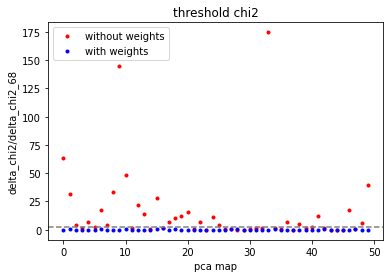

In [136]:
import matplotlib.pyplot as plt
plt.plot(threshold, color='red', marker='.', linestyle = 'None', label='without weights')
plt.plot(threshold_weights, color='blue', marker='.', linestyle = 'None', label='with weights')
#plt.plot(chi2, color='blue', marker='.', label='cov')
#plt.hist(chi2, bins = 15)
plt.legend()
plt.ylabel('delta_chi2/delta_chi2_68') 
plt.xlabel('pca map')
plt.title("threshold chi2") 
plt.axhline(y=2, color='grey', linestyle='--')
plt.show()

In [137]:
for x in range(len(threshold_weights)):
    if threshold_weights[x]>2:
        print(x, threshold_weights[x]) 
thresholdweights = np.array(threshold_weights)
print()
print(thresholdweights.max())


1.5557837714946583


In [25]:
# 33, 0, 8, 15, 46, 1, 12, 13, 6, 19, 33, 9, 20, 24, 22, 48, 41, 7, 25, 4, 40, 17, 36, 3, 49, 32, 8, 5, 31
# 39, 2, 38, 11

#Area in Training Region only:
import fitsio as fio
import pymangle

path = '/fs/scratch/PCON0008/warner785/bwarner/'

x = fio.read(path + 'mask_DR12v5_CMASS_South.fits.gz')
m = pymangle.Mangle(path + 'mask_DR12v5_CMASS_South.ply')

select_north = (x['RAMID']>100)*(x['RAMID']<300)
select_south = ~select_north

poly_areas = m.get_areas()

area_north = np.sum(poly_areas[select_north])
area_south = np.sum(poly_areas[select_south])
print(area_south)

#training region:
mask = (x['RAMID']>18)*(x['RAMID']<43)*select_south
mask = mask*(x['DECMID']>-10)*(x['DECMID']<10)
select_train = x[mask]

area_train = np.sum(poly_areas[select_train])

2901.8059807725780206


IndexError: arrays used as indices must be of integer (or boolean) type